In [34]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

baseline = np.loadtxt("data/MOF808.xy", delimiter=' ')
shifted = np.loadtxt("data/79A64-130.xy", delimiter=' ')

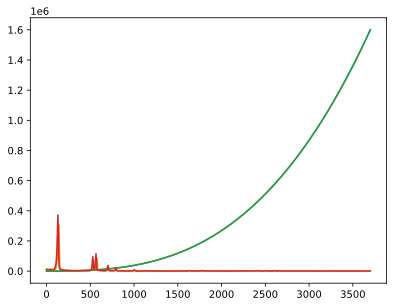

In [73]:
plt.plot(baseline)
plt.plot(shifted)
plt.show()

In [53]:
sim = (baseline * shifted).sum()
print(f"{sim:.2e}")

1.17e+12


1.66e+12


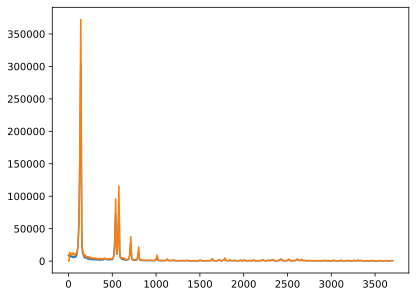

In [72]:
x, baseline_values = baseline.T
_x, shifted_values = shifted.T

n = len(baseline_values)

np.pad(baseline_values, (n, n), constant_values=0)
np.pad(shifted_values, (0, 2*n), constant_values=0)

def shift_maximize_multiply():
    for i in range(2*n):
        w = np.roll(shifted_values, i)
        yield i, (baseline_values * w).sum()

i, sim = max(shift_maximize_multiply(), key=lambda x: x[1])

print(f"{sim:.2e}")

x, baseline_values = baseline.T
_x, shifted_values = shifted.T

plt.plot(baseline_values)
plt.plot(np.roll(shifted_values, i))
plt.show()
